# Red Wine Quality Analysis Using Machine Learning

- This is a machine learning assignment for practice from the open source data: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/.
- This is also uploaded on kaggle as open source data for practice: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- The discription of the data is available at https://archive.ics.uci.edu/ml/datasets/wine+quality
- Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. `The goal is to model wine quality based on physicochemical tests`.

# Attribute Information
Input variables (based on physicochemical tests):
1.  fixed acidity
2.  volatile acidity
3.  citric acid
4.  residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10. sulphates
11. alcohol
`Output variable (based on sensory data)`:
12. quality (score between 0 and 10)

# Reading and Understanding Datasets

In [1]:
# Import the required libraries for the analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the dataset for red wine from the open source UCI machine learning repositories

red_wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter=';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Importing the datasets for white wine from the open source UCI machine learning repositories

white_wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',delimiter=';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Displaying the information about columns of the red wine
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Displaying the information about columns of the white wine
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Data Preparation and Exploratory Data Analysis

In [6]:
# Checking the null value percentages from red_wine data
red_wine_data.isnull().sum()/red_wine_data.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
# Checking the null value percentages from the white wine data
white_wine_data.isnull().sum()/white_wine_data.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

- There are no null values present in the data and everything is already in the required format, we can proceed with exploratory data analysis.

In [8]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


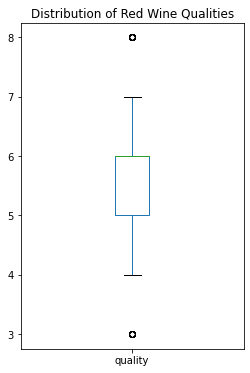

In [9]:
# Box plot for quality of red wine
plt.figure(figsize=(4,6))
red_wine_data.quality.plot.box()
plt.title('Distribution of Red Wine Qualities')
plt.show()

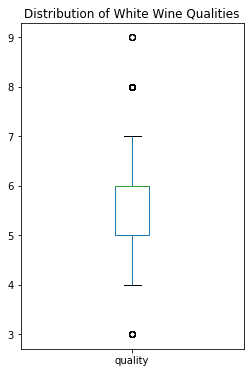

In [10]:
# Box plot for quality of white wine
plt.figure(figsize=(4,6))
white_wine_data.quality.plot.box()
plt.title('Distribution of White Wine Qualities')
plt.show()

- We can clearly see there are some outliers which has to removed, as they may affect our analysis.
- Considering only values which has `wine quality between 4.0 to 7.0`.

In [11]:
red_wine_data.shape

(1599, 12)

In [12]:
# Removing outliers for red wine data
red_wine_data = red_wine_data[(red_wine_data.quality >= 4.0) & (red_wine_data.quality <= 7.0)]
red_wine_data.shape

(1571, 12)

In [13]:
white_wine_data.shape

(4898, 12)

In [14]:
# Removing outliers for white wine data
white_wine_data = white_wine_data[(white_wine_data.quality >= 4.0) & (white_wine_data.quality <= 7.0)]
white_wine_data.shape

(4698, 12)

In [15]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Function to plot a subplot of the provided column from the data againse quality
def plt_linegraph(data, y_axis, title, axis):
    sns.lineplot(y= y_axis, x='quality', data = data, ax = axis)
    axis.set_title(title)

In [17]:
# Plotting the line plots againts the quality for the fixed acidity and volatile acidity
def plt_linegraphs_againt_quality(data, title):
    fig, ax = plt.subplots(3, 4, figsize=(10,7))
    fig.tight_layout(h_pad=5)
    columns = [column for column in data.columns]
    columns.remove('quality')
    num=0
    for i in range(3):
        for j in range(4):
            if num>10:
                fig.delaxes(ax[i,j])
                break
            plt_linegraph(data, columns[num], columns[num].capitalize(), ax[i,j])
            num+=1

    fig.suptitle(title,fontsize=15)
    plt.subplots_adjust(top=0.87)
    plt.show()

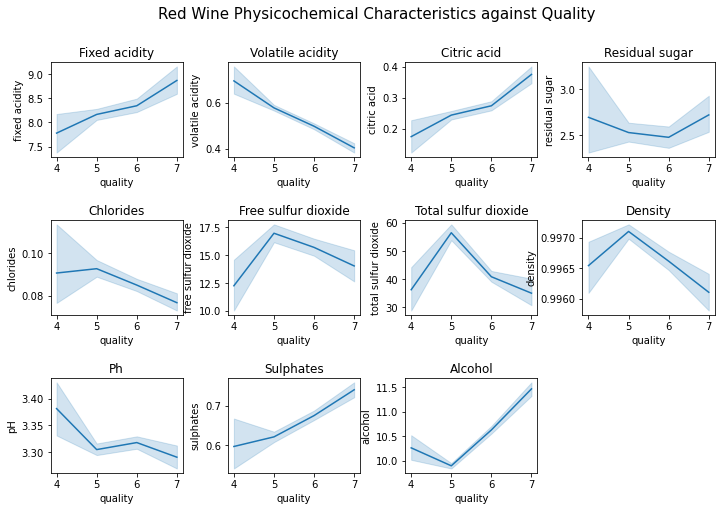

In [18]:
plt_linegraphs_againt_quality(red_wine_data,'Red Wine Physicochemical Characteristics against Quality')

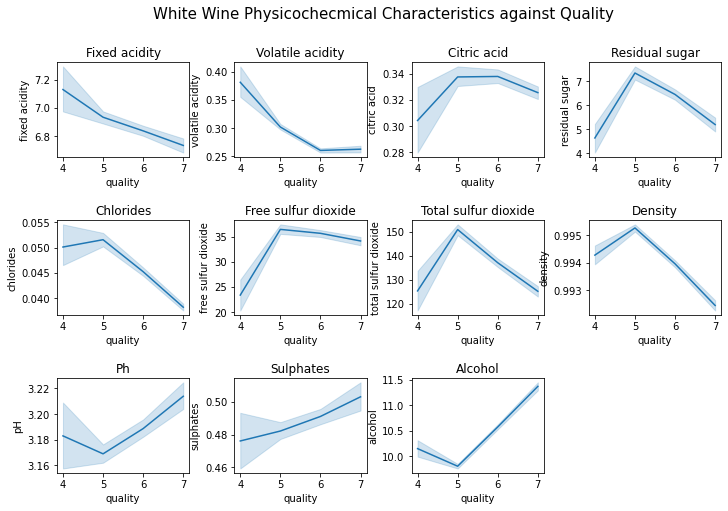

In [19]:
plt_linegraphs_againt_quality(white_wine_data,'White Wine Physicochecmical Characteristics against Quality')

#### Inferences from the above line graphs of red and white wines physicochemical properties against quality:
1. There is exact opposite relationship is observed for Red and White wine against quality for Fixed Acidity, Residual Sugar and PH values.
2. Remaining characteristics shows almost similar characteristics for both Red and White Wine to decide quality.

# Train Test Split and Interdependency Analysis

In [20]:
# Splitting the data into test and train data sets
train_red_wine, test_red_wine = train_test_split(red_wine_data, train_size = 0.7, random_state=100)

In [21]:
# Splitting the data into test and train data sets
train_white_wine, test_white_wine = train_test_split(white_wine_data, train_size = 0.7, random_state=100)

In [22]:
# Displaying the data for some visualization
train_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1560,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.90,5
570,11.5,0.350,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.00,6
124,7.8,0.500,0.17,1.6,0.082,21.0,102.0,0.99600,3.39,0.48,9.50,5
1396,8.7,0.675,0.10,1.6,0.090,4.0,11.0,0.99745,3.31,0.65,9.55,5
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.50,5


In [23]:
test_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1493,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
577,8.8,0.44,0.49,2.8,0.083,18.0,111.0,0.99820,3.30,0.60,9.5,5
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1287,8.0,0.60,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5
437,11.1,0.45,0.73,3.2,0.066,6.0,22.0,0.99860,3.17,0.66,11.2,6


In [24]:
# Discribing the data to analyze the columns
train_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,8.327298,0.529832,0.269318,2.518835,0.087207,15.799818,46.531392,0.996764,3.308044,0.655514,10.383060,5.630573
std,1.712480,0.177748,0.193411,1.409960,0.043864,10.404215,33.160140,0.001851,0.150150,0.166977,1.049987,0.742916
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.500000,4.000000
25%,7.150000,0.390000,0.095000,1.900000,0.071000,7.500000,22.000000,0.995660,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996770,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.500000,0.997800,3.400000,0.730000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.400000,0.610000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,7.000000


#### Scaling the training and test data using fir_transform and transform method respectively using Standard Scaling

In [25]:
scaler = StandardScaler()

In [26]:
scale_columns = [i for i in red_wine_data.columns if i!='quality']
scale_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [27]:
# Scaling Red Wine Columns using Standard Scaler
scaled_values = scaler.fit_transform(train_red_wine[scale_columns].values)
scaled_train_red_wine = pd.DataFrame(scaled_values,index=train_red_wine.index,columns=scale_columns)
scaled_train_red_wine['quality'] = train_red_wine['quality']
scaled_train_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1560,-0.308055,0.394942,-0.048197,-0.368146,-0.164369,1.461629,2.548453,-0.293957,-0.653268,-0.811942,-0.460273,5
570,1.853538,-1.012182,1.141519,0.554285,-0.392453,-0.557703,-0.287566,1.910743,0.079665,1.524769,0.587836,6
124,-0.308055,-0.167907,-0.513738,-0.651971,-0.118753,0.500042,1.673511,-0.412838,0.546078,-1.051604,-0.841403,5
1396,0.217738,0.817079,-0.875825,-0.651971,0.063714,-1.134655,-1.071997,0.370695,0.013035,-0.033038,-0.793762,5
1347,-0.658583,0.704509,-1.237913,-0.510059,-0.209986,-0.846179,-1.041827,-0.483086,0.212926,-1.590845,-0.841403,5


In [28]:
# Using the scaler fitted model to scale the test dataset.
scaled_test_values = scaler.transform(test_red_wine[scale_columns].values)
scaled_test_red_wine = pd.DataFrame(scaled_test_values,index=test_red_wine.index,columns=scale_columns)
scaled_test_red_wine['quality'] = test_red_wine['quality']
scaled_test_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1493,-0.366476,0.057232,-0.048197,-0.439103,0.040906,0.692360,3.031180,-0.218306,-0.320116,-0.392532,-0.650838,5
577,0.276160,-0.505617,1.141519,0.199504,-0.095944,0.211567,1.945045,0.775971,-0.053595,-0.332616,-0.841403,5
1579,-1.242798,0.169802,-0.927552,-0.581015,-0.780194,0.788518,-0.438418,-1.482766,1.545532,-0.332616,0.873684,5
1287,-0.191212,0.394942,-0.979279,0.057591,-0.711769,-1.230813,-1.192679,-2.109592,-0.586638,-1.710677,2.493489,5
437,1.619852,-0.449332,2.382962,0.483329,-0.483686,-0.942337,-0.740122,0.992118,-0.919789,0.026878,0.778401,6


In [29]:
scaler = StandardScaler()

In [30]:
# Scaling White Wine Columns using Standard Scaler
scaled_values = scaler.fit_transform(train_white_wine[scale_columns].values)
scaled_train_white_wine = pd.DataFrame(scaled_values,index=train_white_wine.index,columns=scale_columns)
scaled_train_white_wine['quality'] = train_white_wine['quality']
scaled_train_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3310,-0.661622,0.223164,-0.362800,-0.847522,0.077039,-0.139716,0.088625,-1.544525,0.215575,-0.261821,2.026101,7
1667,2.326993,1.127556,0.043192,-0.088657,0.380240,-0.139716,-0.246662,-0.464015,-1.587507,0.182016,1.108162,6
1278,0.175190,-0.379764,0.205589,-0.288358,1.593044,-1.545313,-0.126916,0.052153,0.950164,-1.060727,0.273672,6
4319,-0.183444,1.328532,-0.768792,-0.188508,-0.486049,-0.139716,-0.558000,-1.358705,-0.452233,-0.439355,2.020538,7
787,1.012002,0.625116,-0.443998,0.929820,-0.269477,-0.261942,-0.510102,1.411393,0.549479,-1.770866,-1.061512,6


In [31]:
# Using the scaler fitted model to scale the test dataset.
scaled_test_values = scaler.transform(test_white_wine[scale_columns].values)
scaled_test_white_wine = pd.DataFrame(scaled_test_values,index=test_white_wine.index,columns=scale_columns)
scaled_test_white_wine['quality'] = test_white_wine['quality']
scaled_test_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3522,-0.302988,0.424140,0.611581,0.170955,0.077039,1.204768,0.950793,0.454763,0.082014,-0.261821,-0.894614,5
424,0.055646,-0.480252,0.367986,0.390626,0.033724,0.715865,0.567607,0.465086,1.016945,0.270784,0.023325,7
769,-0.183444,-1.686108,0.043192,0.490477,-0.139534,0.349187,-0.605898,0.740376,1.551192,-0.794425,-0.978063,7
219,0.772913,-0.480252,0.205589,0.131015,-0.442735,0.471413,0.543658,-0.085492,-0.986479,-1.504564,0.440570,5
1682,0.414279,-0.279276,-0.443998,1.608805,0.380240,1.204768,1.597418,1.566243,-0.452233,-0.971960,-1.228410,7


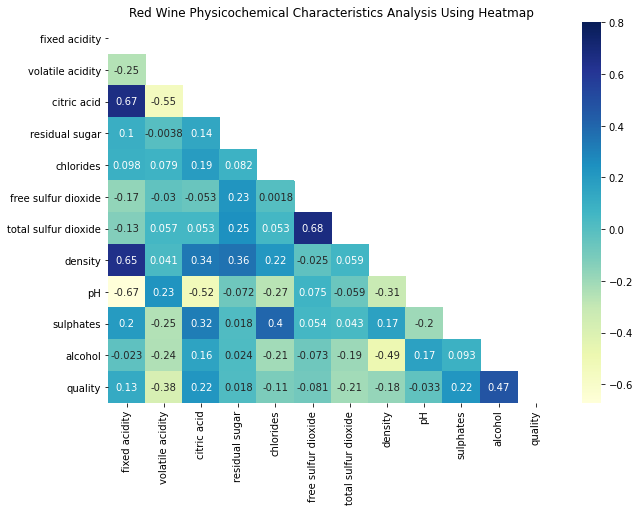

In [32]:
# Let's analyze the intercorrelation of the variables from both the train data sets using heatmaps
plt.figure(figsize = (10,7))
mask = np.triu(np.ones_like(scaled_train_red_wine.corr()))
sns.heatmap(scaled_train_red_wine.corr(), mask=mask, cmap='YlGnBu', vmax=0.8, annot=True)
plt.title('Red Wine Physicochemical Characteristics Analysis Using Heatmap')
plt.show()

##### Inferences from the above heatmap:
1. We can see there are some values like citric acid and fixed acidity, density and fixed acidity, total sulfur dioxide and free sulfur dioxide.
2. We can drop one of the columns based on the business understanding before starting the actual model building.

In [33]:
# Dropping two columns viz. free sulfur dioxide and fixed acidity as they migh cause multicollinearity
scaled_train_red_wine.drop(['free sulfur dioxide', 'fixed acidity'],axis=1,inplace=True)
scaled_test_red_wine.drop(['free sulfur dioxide', 'fixed acidity'],axis=1,inplace=True)

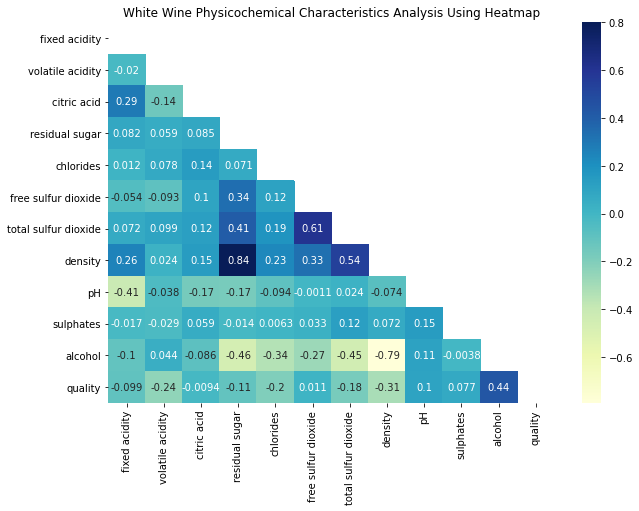

In [34]:
# Let's analyze the intercorrelation of the variables from both the train data sets using heatmaps
plt.figure(figsize = (10,7))
mask = np.triu(np.ones_like(scaled_train_white_wine.corr()))
sns.heatmap(scaled_train_white_wine.corr(), mask=mask, cmap='YlGnBu', vmax=0.8, annot=True)
plt.title('White Wine Physicochemical Characteristics Analysis Using Heatmap')
plt.show()

##### Inferences from the above heatmap:
1. We can see there is very high correlation between density and residual sugar.
2. We can drop one of the columns based on the business understanding before starting the actual model building.`

In [35]:
# Dropping the column density as it migh cause multicollinearity.
scaled_train_white_wine.drop(['density'],axis=1,inplace=True)
scaled_test_white_wine.drop(['density'],axis=1,inplace=True)

# Model Building for Red Wine Data Set

- We will start building the model for red wine train data set and then make predictions for the quality of the data over test data to analyze the accuracy and the factors affecting the quality of the wine.

In [36]:
# Let's create X and Y variables to build the model.
y_train_red_wine = scaled_train_red_wine.pop('quality')
X_train_red_wine = scaled_train_red_wine

In [37]:
# Using statsmodels to build the model and view the required summary
red_wine_model = sm.OLS(y_train_red_wine,sm.add_constant(X_train_red_wine)).fit()
print(red_wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     62.15
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.21e-92
Time:                        01:08:16   Log-Likelihood:                -1004.5
No. Observations:                1099   AIC:                             2029.
Df Residuals:                    1089   BIC:                             2079.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6306 

##### Inferences from the model:
- The R-squared and adjusted r-squared values is significantly less, that means the data is covering only 33.9% of the variance to contribute towards predicting the quality.
- Also there are some insignificant columns present in the model. So we can use Recursive Function Analysis method to select the major contributing variables in making the prediction.

In [38]:
# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train_red_wine, y_train_red_wine)

rfe = RFE(lm, 7) # running RFE
rfe = rfe.fit(X_train_red_wine, y_train_red_wine)

In [39]:
# Displaying the column information with their rank of support for the model
rfe_details = pd.DataFrame({'Column':X_train_red_wine.columns,'RFE_Supported':rfe.support_,'RFE_Rank':rfe.ranking_})
rfe_details

,Column,RFE_Supported,RFE_Rank
0,volatile acidity,True,1
1,citric acid,False,3
2,residual sugar,True,1
3,chlorides,True,1
4,total sulfur dioxide,True,1
5,density,False,2
6,pH,True,1
7,sulphates,True,1
8,alcohol,True,1


In [40]:
# Extracting the required columns for model building
col_to_consider = list(X_train_red_wine.columns[rfe.support_])

In [41]:
# Again building the model using statsmodels with the columns considered by RFE method.
red_wine_model = sm.OLS(y_train_red_wine,sm.add_constant(X_train_red_wine[col_to_consider])).fit()
print(red_wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     79.83
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.48e-93
Time:                        01:08:17   Log-Likelihood:                -1005.1
No. Observations:                1099   AIC:                             2026.
Df Residuals:                    1091   BIC:                             2066.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6306 

In [42]:
# Let's define the function to calculate the VIFs (Variance Inflation Factor) to analyze the multicollinearity
def cal_vif_red_wine(col_to_consider):
    vif = pd.DataFrame()
    X = X_train_red_wine[col_to_consider]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [43]:
cal_vif_red_wine(col_to_consider)

,Features,VIF
2,chlorides,1.38
5,sulphates,1.35
0,volatile acidity,1.25
6,alcohol,1.22
4,pH,1.21
3,total sulfur dioxide,1.12
1,residual sugar,1.09


- All the values have a good VIFs but we can observe some insignificant variables in the model with high p values.

### Building Model 1

In [44]:
# Dropping the pH from the model and rebuilding it.
first_model_cols = col_to_consider[:]
first_model_cols.remove('pH')

In [45]:
red_wine_model1 = sm.OLS(y_train_red_wine,sm.add_constant(X_train_red_wine[first_model_cols])).fit()
print(red_wine_model1.summary())
print("\n\nVIFs of columns: ")
print(cal_vif_red_wine(first_model_cols))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     92.71
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.06e-94
Time:                        01:08:18   Log-Likelihood:                -1006.1
No. Observations:                1099   AIC:                             2026.
Df Residuals:                    1092   BIC:                             2061.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6306 

- Residual sugar is also insignificant after rebuilding the model with slightly higher p value.

### Building Model 2

In [46]:
# Dropping the pH from the model and rebuilding it.
second_model_cols = first_model_cols[:]
second_model_cols.remove('residual sugar')

In [47]:
red_wine_model2 = sm.OLS(y_train_red_wine,sm.add_constant(X_train_red_wine[second_model_cols])).fit()
print(red_wine_model2.summary())
print("\n\nVIFs of columns: ")
print(cal_vif_red_wine(second_model_cols))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.16e-94
Time:                        01:08:18   Log-Likelihood:                -1007.9
No. Observations:                1099   AIC:                             2028.
Df Residuals:                    1093   BIC:                             2058.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6306 

##### Inferences from the above model:
- This seems to be a good model with no insignificant values and a very good VIF values.
- We have got a low R-squared and adjusted R-squared values though which means these fields contribute less towards predicting the quality of wine. May be this can be avoided by using very large date set or by introducing some more information in the dataset which might be relevant in predicting the quality of red wine.
- Let's start residual analysis and make predictions using the models.

In [48]:
# Dividing the test data into X and y for model building
y_test_red_wine = test_red_wine.pop('quality')
X_test_red_wine = test_red_wine

In [49]:
# Making predictions using the model 1 to calculate the r-squared and adjusted r-squared for the test data 

X = X_test_red_wine[first_model_cols]
predicted_count = red_wine_model1.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_red_wine, predicted_count)
pred_r_squared = r2_score(y_test_red_wine, predicted_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_count)-1)/(len(predicted_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : red_wine_model1.rsquared,
         'Adjusted R-squared' : red_wine_model1.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model1_results = pd.DataFrame(data)
print("Mean Squared Error for Model 1: ",pred_mse)
print("\n",model1_results)

Mean Squared Error for Model 1:  17.21878387292104

                     Train_Data  Test_Data
R-squared             0.337484 -29.574087
Adjusted R-squared    0.333844 -29.968591


##### Inferences from the predictions:
- As we have got negative r-squared values, that means it's making wrong predictions over the test data sets.
- This data makes no sense in predicting the quality of the red wine using this model.

In [50]:
# Making predictions using the model 2 to calculate the r-squared and adjusted r-squared for the test data 

X = X_test_red_wine[second_model_cols]
predicted_count = red_wine_model2.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_red_wine, predicted_count)
pred_r_squared = r2_score(y_test_red_wine, predicted_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_count)-1)/(len(predicted_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : red_wine_model2.rsquared,
         'Adjusted R-squared' : red_wine_model2.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model2_results = pd.DataFrame(data)
print("Mean Squared Error for Model 2: ",pred_mse)
print("\n",model2_results)

Mean Squared Error for Model 2:  13.655408488802017

                     Train_Data  Test_Data
R-squared             0.335316 -23.246872
Adjusted R-squared    0.332275 -23.507031


##### Inferences from the predictions:
- As we have got negative r-squared values, that means it's making wrong predictions over the test data sets.
- This data makes no sense in predicting the quality of the red wine using this model.

## Residual Analysis

In [51]:
predicted_quality = red_wine_model2.predict(sm.add_constant(X_train_red_wine[second_model_cols]))

Text(0.5, 0, 'Errors')

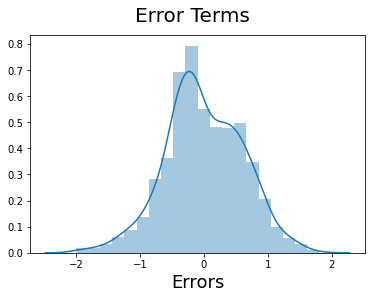

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_red_wine - predicted_quality), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

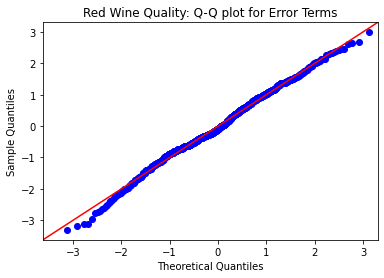

In [53]:
# Plotting the qqplot to check the error terms standard normal distribution
sm.qqplot((y_train_red_wine - predicted_quality),fit=True, line='45')
plt.title('Red Wine Quality: Q-Q plot for Error Terms')
plt.show()

#### Inferences from the above Distplot:
- We have plotted the histogram of error terms i.e. difference between the actual and predicted values for the trained data.
- From the Q-Q plot, the quantiles of error terms are matched with the line at 45 degree. That means we are comparing the distribution of error terms with standard normal distribution. And from the plot we can say that 
- With respect to assumption for linear regression, the error terms should be normally distributed, by observing the above distribution plot, we can say that `the error terms are normally distributed` and the assumption is not violated.

Text(0, 0.5, 'Error Terms')

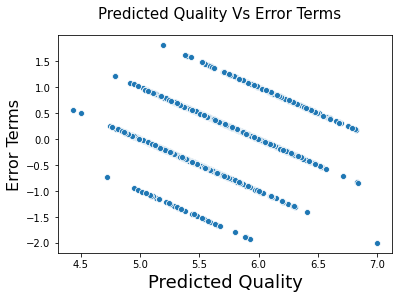

In [54]:
# Let's plot the scatter plot between the residuals and the predicted values.
sns.scatterplot(x=predicted_quality, y=y_train_red_wine-predicted_quality)
plt.suptitle('Predicted Quality Vs Error Terms', fontsize=15) 
plt.xlabel('Predicted Quality', fontsize=18)
plt.ylabel('Error Terms', fontsize=16)

#### Inferences from the above scatterplot:
- We can clearly observe relationship between the predicted values and error terms based on a specific pattern. Those aren't centered around zero, and this is not uniform throughout the data.
- So we can say that our model is `not a very good model` as there is some specific relation observed between the `predicted values and error terms` from the scatterplot. Our assumption for `independence of error terms is violated`.

#### Analysis of Actual Vs Predicted Quality

Text(0, 0.5, 'Count')

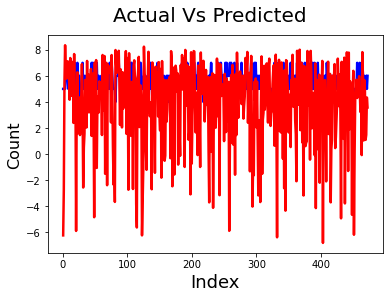

In [55]:
#Actual vs Predicted
c = [i for i in range(1,y_test_red_wine.shape[0]+1,1)]
fig = plt.figure()
plt.plot(c,y_test_red_wine, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_count, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual Vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label

#### Inferences from the above scatter plot for the actual vs predicted count on test data for 'average' column:
- We have plotted the actual values for quality column vs the predicted values for quality column using Model2.
- We can see the predicted values from the actual values differ a lot.
- Thus we can conclude that our model does not predict well for the test data.

# Model Building for White Wine Data Set

- We will start building the model for white wine train data set and then make predictions for the quality of the data over test data to analyze the accuracy and the factors affecting the quality of the wine.

In [56]:
# Let's create X and Y variables to build the model.
y_train_white_wine = scaled_train_white_wine.pop('quality')
X_train_white_wine = scaled_train_white_wine

In [57]:
# Using statsmodels to build the model and view the required summary
white_wine_model = sm.OLS(y_train_white_wine,sm.add_constant(X_train_white_wine)).fit()
print(white_wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.07e-239
Time:                        01:08:20   Log-Likelihood:                -3220.2
No. Observations:                3288   AIC:                             6462.
Df Residuals:                    3277   BIC:                             6529.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8163 

##### Inferences from the model:
- The R-squared and adjusted r-squared values is significantly less, that means the data is covering only 30% of the variance to contribute towards predicting the quality.
- Also there are some insignificant columns present in the model. So we can use Recursive Function Analysis method to select the major contributing variables in making the prediction.

In [58]:
# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train_white_wine, y_train_white_wine)

rfe = RFE(lm, 7) # running RFE
rfe = rfe.fit(X_train_white_wine, y_train_white_wine)

In [59]:
# Displaying the column information with their rank of support for the model
rfe_details = pd.DataFrame({'Column':X_train_white_wine.columns,'RFE_Supported':rfe.support_,'RFE_Rank':rfe.ranking_})
rfe_details

,Column,RFE_Supported,RFE_Rank
0,fixed acidity,True,1
1,volatile acidity,True,1
2,citric acid,False,4
3,residual sugar,True,1
4,chlorides,False,3
5,free sulfur dioxide,True,1
6,total sulfur dioxide,True,1
7,pH,False,2
8,sulphates,True,1
9,alcohol,True,1


In [60]:
# Extracting the required columns for model building
col_to_consider = list(X_train_white_wine.columns[rfe.support_])

In [61]:
# Again building the model using statsmodels with the columns considered by RFE method.
white_wine_model = sm.OLS(y_train_white_wine,sm.add_constant(X_train_white_wine[col_to_consider])).fit()
print(white_wine_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          6.46e-242
Time:                        01:08:21   Log-Likelihood:                -3222.9
No. Observations:                3288   AIC:                             6462.
Df Residuals:                    3280   BIC:                             6511.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8163 

In [62]:
# Let's define the function to calculate the VIFs (Variance Inflation Factor) to analyze the multicollinearity
def cal_vif_white_wine(col_to_consider):
    vif = pd.DataFrame()
    X = X_train_white_wine[col_to_consider]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [63]:
cal_vif_white_wine(col_to_consider)

,Features,VIF
4,total sulfur dioxide,2.05
3,free sulfur dioxide,1.73
6,alcohol,1.45
2,residual sugar,1.40
1,volatile acidity,1.07
0,fixed acidity,1.03
5,sulphates,1.03


- All the values have a good VIFs but we can observe some insignificant variables in the model with high p values.

### Building Model 1

In [64]:
# Dropping the total sulfur dioxide from the model and rebuilding it.
first_model_cols = col_to_consider[:]
first_model_cols.remove('total sulfur dioxide')

In [65]:
white_wine_model1 = sm.OLS(y_train_white_wine,sm.add_constant(X_train_white_wine[first_model_cols])).fit()
print(white_wine_model1.summary())
print("\n\nVIFs of columns: ")
print(cal_vif_white_wine(first_model_cols))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.57e-242
Time:                        01:08:21   Log-Likelihood:                -3225.1
No. Observations:                3288   AIC:                             6464.
Df Residuals:                    3281   BIC:                             6507.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8163    

##### Inferences from the above model:
- This seems to be a good model with no insignificant values and a very good VIF values.
- We have got a low R-squared and adjusted R-squared values though which means these fields contribute less towards predicting the quality of wine. May be this can be avoided by using very large date set or by introducing some more information in the dataset which might be relevant in predicting the quality of red wine.
- Let's start residual analysis and make predictions using the models.

In [66]:
# Dividing the test data into X and y for model building
y_test_white_wine = test_white_wine.pop('quality')
X_test_white_wine = test_white_wine

In [67]:
# Making predictions using the model 1 to calculate the r-squared and adjusted r-squared for the test data 

X = X_test_white_wine[first_model_cols]
predicted_white_count = white_wine_model1.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_white_wine, predicted_white_count)
pred_r_squared = r2_score(y_test_white_wine, predicted_white_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_white_count)-1)/(len(predicted_white_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : white_wine_model1.rsquared,
         'Adjusted R-squared' : white_wine_model1.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model1_results = pd.DataFrame(data)
print("Mean Squared Error for Model 1: ",pred_mse)
print("\n",model1_results)

Mean Squared Error for Model 1:  48.22267884699318

                     Train_Data  Test_Data
R-squared             0.292486 -76.301456
Adjusted R-squared    0.291193 -76.632040


##### Inferences from the predictions:
- As we have got negative r-squared values, that means it's making wrong predictions over the test data sets.
- This data makes no sense in predicting the quality of the red wine using this model.

## Residual Analysis

In [68]:
predicted_train_white_quality = white_wine_model1.predict(sm.add_constant(X_train_white_wine[first_model_cols]))

Text(0.5, 0, 'Errors')

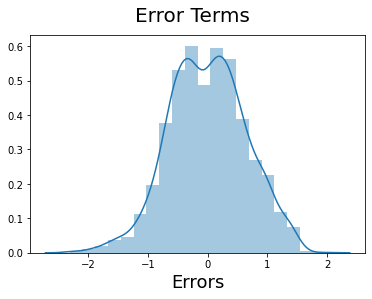

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_white_wine - predicted_train_white_quality), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

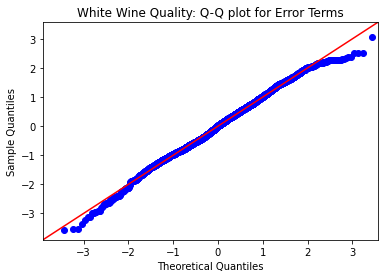

In [70]:
# Plotting the qqplot to check the error terms standard normal distribution
sm.qqplot((y_train_white_wine - predicted_train_white_quality),fit=True, line='45')
plt.title('White Wine Quality: Q-Q plot for Error Terms')
plt.show()

#### Inferences from the above Distplot:
- We have plotted the histogram of error terms i.e. difference between the actual and predicted values for the trained data.
- From the Q-Q plot, the quantiles of error terms are matched with the line at 45 degree. That means we are comparing the distribution of error terms with standard normal distribution. And from the plot we can say that 
- With respect to assumption for linear regression, the error terms should be normally distributed, by observing the above distribution plot, we can say that `the error terms are normally distributed` and the assumption is not violated.

Text(0, 0.5, 'Error Terms')

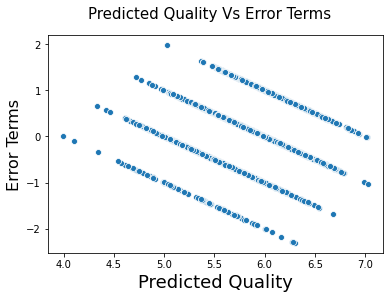

In [71]:
# Let's plot the scatter plot between the residuals and the predicted values.
sns.scatterplot(x=predicted_train_white_quality, y=y_train_white_wine-predicted_train_white_quality)
plt.suptitle('Predicted Quality Vs Error Terms', fontsize=15) 
plt.xlabel('Predicted Quality', fontsize=18)
plt.ylabel('Error Terms', fontsize=16)

#### Inferences from the above scatterplot:
- We can clearly observe relationship between the predicted values and error terms based on a specific pattern. Those aren't centered around zero, and this is not uniform throughout the data.
- So we can say that our model is `not a very good model` as there is some specific relation observed between the `predicted values and error terms` from the scatterplot. Our assumption for `independence of error terms is violated`.

#### Analysis of Actual Vs Predicted Quality

Text(0, 0.5, 'Count')

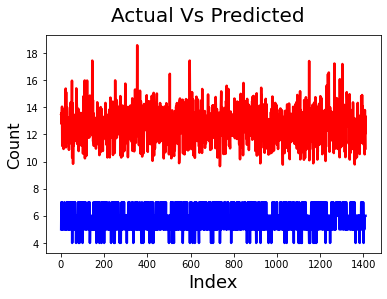

In [72]:
#Actual vs Predicted
c = [i for i in range(1,y_test_white_wine.shape[0]+1,1)]
fig = plt.figure()
plt.plot(c,y_test_white_wine, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_white_count, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual Vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label

#### Inferences from the above scatter plot for the actual vs predicted count on test data for 'average' column:
- We have plotted the actual values for quality column vs the predicted values for quality column using Model2.
- We can see the predicted values from the actual values differ a lot.
- Thus we can conclude that our model does not predict well for the test data.

### Summary
1. lower level of volatile acidity, chlorides and pH results in better tasting Wine
2. significant interactions between: alcohol & sulphates - positive correlation with wine rating
3. total sulfur dioxide & sulphates - negative correlation with wine rating
4. same level of sulphates should go with a higher level of alcohol and a lower level of total sulfur dioxide
5. The big collinearities mostly involve insignificant attributes (Fixed acidity and density)
6. Adjusted R-squared is only 30.9% (avg percentage), implying a limited level of fit of the model

#### We can think of building the model with using logistic regression with good quality and bad quality as result with qualtity >6 as good and <6 as bad.

# Building Logistic Regression Model

- As we have got negative values for R-Squared and Adjusted R-Squared, this means the linear regression model is not very efficient in predicting the quality of the wine.
- Hence, we can think of building logistic regression (or ideally any other method) model to predict the values effectively.

In [73]:
y_train_red_wine.value_counts()

5    479
6    445
7    141
4     34
Name: quality, dtype: int64

- After analyzing the quality values for the wines, we can consider a threshold range for wine between 4,5,6 and 7 to be 5.
- Any wine with quality below or 5, considered as bad quality wine and any wine above 5 considered as good quality.
- Let's start building the logistic regression model with red and white wine dataset.

In [74]:
# Let's convert the quality of the test and train data to have only good and bad quality.
y_train_red_wine = y_train_red_wine.apply(lambda x: 1 if x>5 else 0)
y_train_white_wine = y_train_white_wine.apply(lambda x: 1 if x>5 else 0)
y_test_red_wine = y_test_red_wine.apply(lambda x: 1 if x>5 else 0)
y_test_white_wine = y_test_white_wine.apply(lambda x: 1 if x>5 else 0)

## Logistic Regression Model for Red Wine Data

In [75]:
logisticRegression = sm.GLM(y_train_red_wine,sm.add_constant(X_train_red_wine), family = sm.families.Binomial())
res = logisticRegression.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1099
Model:                            GLM   Df Residuals:                     1089
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -587.11
Date:                Wed, 20 Jan 2021   Deviance:                       1174.2
Time:                        01:08:23   Pearson chi2:                 1.23e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2376 

- There are some insignificant values in the model after overlook at p values.
- Hence, we can consider building model using RFE and then predict the results.

In [76]:
# Running RFE with the output number of the variable equal to 5
logReg = LogisticRegression()
logReg.fit(X_train_red_wine, y_train_red_wine)

rfe = RFE(logReg, 5) # running RFE
rfe = rfe.fit(X_train_red_wine, y_train_red_wine)

In [77]:
# Displaying the column information with their rank of support for the model
rfe_details = pd.DataFrame({'Column':X_train_red_wine.columns,'RFE_Supported':rfe.support_,'RFE_Rank':rfe.ranking_})
rfe_details

,Column,RFE_Supported,RFE_Rank
0,volatile acidity,True,1
1,citric acid,False,2
2,residual sugar,False,3
3,chlorides,True,1
4,total sulfur dioxide,True,1
5,density,False,5
6,pH,False,4
7,sulphates,True,1
8,alcohol,True,1


In [78]:
# Extracting the required columns for model building
col_to_consider = list(X_train_red_wine.columns[rfe.support_])

In [79]:
### Again building the model using the selected columns
logisticRegression = sm.GLM(y_train_red_wine,sm.add_constant(X_train_red_wine[col_to_consider]), family = sm.families.Binomial())
res = logisticRegression.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1099
Model:                            GLM   Df Residuals:                     1093
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -589.93
Date:                Wed, 20 Jan 2021   Deviance:                       1179.9
Time:                        01:08:24   Pearson chi2:                 1.17e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2403 

In [80]:
# Dropping the column chlorides and then rebuilding the model
col_to_consider.remove('chlorides')
logisticRegression = sm.GLM(y_train_red_wine,sm.add_constant(X_train_red_wine[col_to_consider]), family = sm.families.Binomial())
res = logisticRegression.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 1099
Model:                            GLM   Df Residuals:                     1094
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -591.50
Date:                Wed, 20 Jan 2021   Deviance:                       1183.0
Time:                        01:08:24   Pearson chi2:                 1.19e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2423 

##### Inferences:
- This looks to be a significant and acceptable model by looking at p values

### Making Predictions Using Logistic Regression for Red Wine Dataset

In [81]:
# Getting the predicted probability values on the train set
predicted_train_red_quality = res.predict(sm.add_constant(X_train_red_wine[col_to_consider]))
predicted_train_red_quality.head()

1560    0.156799
570     0.865754
124     0.191046
1396    0.374328
1347    0.284885
dtype: float64

In [82]:
predicted_train_red_quality = predicted_train_red_quality.values.reshape(-1)
predicted_train_red_quality

array([0.1567985 , 0.86575437, 0.19104614, ..., 0.19940557, 0.51424684,
       0.11994211])

##### Creating a dataframe with the actual quality flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Quality':y_train_red_wine.values, 'Quality_Prob': predicted_train_red_quality})
y_train_pred_final.head()

,Quality,Quality_Prob
0,0,0.156799
1,1,0.865754
2,0,0.191046
3,0,0.374328
4,0,0.284885


##### Creating new column 'predicted' with 1 if Quality_Prob > 0.5 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Quality_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Quality,Quality_Prob,predicted
0,0,0.156799,0
1,1,0.865754,1
2,0,0.191046,0
3,0,0.374328,0
4,0,0.284885,0


In [85]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final.predicted )
print(confusion)

[[382 131]
 [148 438]]


In [86]:
# Predicted     bad    good
# Actual
# bad           382    131
# good          148    438  

In [87]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Quality, y_train_pred_final.predicted))

0.7461328480436761


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Quality, y_train_pred_final.Quality_Prob, drop_intermediate = False)

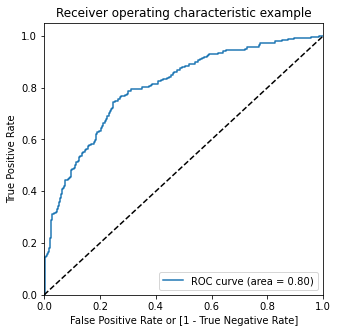

In [90]:
draw_roc(y_train_pred_final.Quality, y_train_pred_final.Quality_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Quality_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Quality,Quality_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.156799,0,1,1,0,0,0,0,0,0,0,0
1,1,0.865754,1,1,1,1,1,1,1,1,1,1,0
2,0,0.191046,0,1,1,0,0,0,0,0,0,0,0
3,0,0.374328,0,1,1,1,1,0,0,0,0,0,0
4,0,0.284885,0,1,1,1,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.533212  1.000000  0.000000
0.1   0.1  0.545951  0.996587  0.031189
0.2   0.2  0.616924  0.970990  0.212476
0.3   0.3  0.688808  0.919795  0.424951
0.4   0.4  0.714286  0.825939  0.586745
0.5   0.5  0.746133  0.747440  0.744639
0.6   0.6  0.708826  0.617747  0.812865
0.7   0.7  0.676979  0.486348  0.894737
0.8   0.8  0.632393  0.360068  0.943470
0.9   0.9  0.554140  0.180887  0.980507


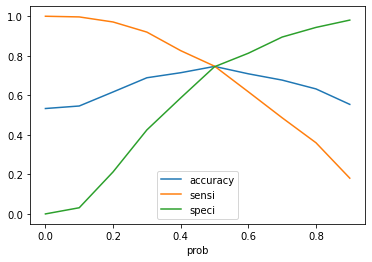

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
- As we have already taken the cutoff as 0.5, there will be no change in the predictions., Let's analyze other factors also.

In [94]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final.predicted )
print(confusion)

[[382 131]
 [148 438]]


In [95]:
# Predicted     bad    good
# Actual
# bad           382    131
# good          148    438  

In [96]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Quality, y_train_pred_final.predicted))

0.7461328480436761


## Metrics beyond simply accuracy

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7474402730375427

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.7446393762183235

In [100]:
# Calculate false postive rate - predicting good quality when wine has bad quality
print(FP/ float(TN+FP))

0.2553606237816764


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.7697715289982425


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.720754716981132


### Making Predictions Using Logistic Regression for White Wine Dataset

In [103]:
# Getting the predicted probability values on the train set
predicted_train_white_quality = res.predict(sm.add_constant(X_train_white_wine[col_to_consider]))
predicted_train_white_quality.head()

3310    0.875365
1667    0.699841
1278    0.617921
4319    0.828586
787     0.204813
dtype: float64

In [104]:
predicted_train_white_quality = predicted_train_white_quality.values.reshape(-1)
predicted_train_white_quality

array([0.87536534, 0.69984113, 0.61792141, ..., 0.78343719, 0.09585503,
       0.81863405])

##### Creating a dataframe with the actual quality flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Quality':y_train_white_wine.values, 'Quality_Prob': predicted_train_white_quality})
y_train_pred_final.head()

,Quality,Quality_Prob
0,1,0.875365
1,1,0.699841
2,1,0.617921
3,1,0.828586
4,1,0.204813


##### Creating new column 'predicted' with 1 if Quality_Prob > 0.5 else 0

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Quality_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Quality,Quality_Prob,predicted
0,1,0.875365,1
1,1,0.699841,1
2,1,0.617921,1
3,1,0.828586,1
4,1,0.204813,0


In [107]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final.predicted )
print(confusion)

[[ 784  333]
 [ 632 1539]]


In [108]:
# Predicted     bad    good
# Actual
# bad           784    333
# good          632    1539  

In [109]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Quality, y_train_pred_final.predicted))

0.7065085158150851


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Quality, y_train_pred_final.Quality_Prob, drop_intermediate = False)

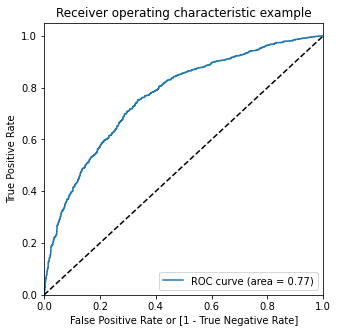

In [112]:
draw_roc(y_train_pred_final.Quality, y_train_pred_final.Quality_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Quality_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Quality,Quality_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.875365,1,1,1,1,1,1,1,1,1,1,0
1,1,0.699841,1,1,1,1,1,1,1,1,0,0,0
2,1,0.617921,1,1,1,1,1,1,1,1,0,0,0
3,1,0.828586,1,1,1,1,1,1,1,1,1,1,0
4,1,0.204813,0,1,1,1,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.660280  1.000000  0.000000
0.1   0.1  0.675791  0.993551  0.058192
0.2   0.2  0.705596  0.953938  0.222919
0.3   0.3  0.731752  0.870106  0.462847
0.4   0.4  0.724453  0.782589  0.611459
0.5   0.5  0.706509  0.708890  0.701880
0.6   0.6  0.656326  0.586366  0.792301
0.7   0.7  0.605535  0.469369  0.870188
0.8   0.8  0.520681  0.304468  0.940913
0.9   0.9  0.402676  0.101796  0.987466


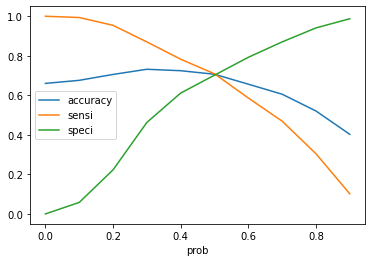

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
- As we have already taken the cutoff as 0.5, there will be no change in the predictions., Let's analyze other factors also.

In [116]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Quality, y_train_pred_final.predicted )
print(confusion)

[[ 784  333]
 [ 632 1539]]


In [117]:
# Predicted     bad    good
# Actual
# bad           784    333
# good          632    1539 

In [118]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Quality, y_train_pred_final.predicted))

0.7065085158150851


## Metrics beyond simply accuracy

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7088899124827268

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.7018800358102059

In [122]:
# Calculate false postive rate - predicting good quality when wine has bad quality
print(FP/ float(TN+FP))

0.2981199641897941


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.8221153846153846


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5536723163841808
